In [5]:
import numpy as np
import cv2
import os
import torch
from sklearn.model_selection import train_test_split
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm.auto import tqdm

In [6]:
from torchvision import transforms

data_transforms = {

    'new_train' : transforms.Compose([
        transforms.RandomResizedCrop((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ]),
    'new_test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()

    ])
}

In [7]:
from torchvision import datasets
import torch
from torch.utils.data import DataLoader
import os

base_dir = '/home/rkk6nx/Project3/CS3/alzheimer-detection-1' # replace with path to your directory 

image_datasets = {
    'new_train': datasets.ImageFolder(os.path.join(base_dir, 'new_train'), data_transforms['new_train']),
    'new_test': datasets.ImageFolder(os.path.join(base_dir, 'new_test'), data_transforms['new_test']),
}

# Create dataloaders
dataloaders = {
    'new_train': DataLoader(image_datasets['new_train'], batch_size=32, shuffle=True),
    'new_test': DataLoader(image_datasets['new_test'], batch_size=32, shuffle=False),
}

# Store dataset sizes
dataset_sizes = {
    'new_train': len(image_datasets['new_train']),
    'new_test': len(image_datasets['new_test']),
}

# Get class names
class_names = image_datasets['new_train'].classes

/tmp/ipykernel_455256/1667909339.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 8, i+1)


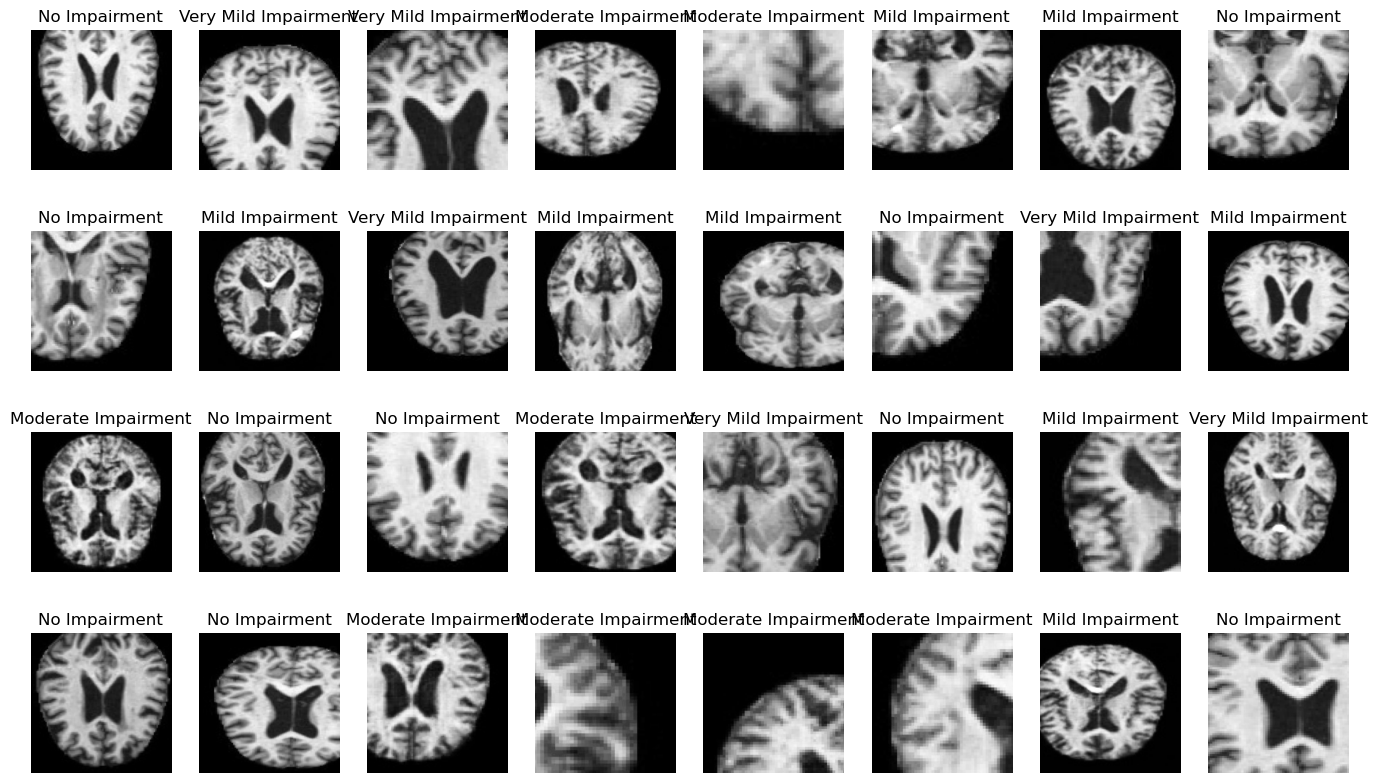

In [34]:
samples, labels = next(iter(dataloaders['new_train']))
plt.figure(figsize=(17, 10))
plt.axis('off')
for i in range(32):
    plt.subplot(4, 8, i+1)
    plt.imshow(samples[i].permute(1, 2, 0))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


In [10]:
from torchvision import models

# Importing the weight class for resnet50
from torchvision.models import ResNet50_Weights

model = models.resnet50(weights=ResNet50_Weights.DEFAULT)

model.fc = nn.Linear(model.fc.in_features, 4)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  
optimizer = optim.Adam(model.parameters(), lr=1e-4) 

In [14]:

model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [15]:
# Number of epochs to train
num_epochs = 30

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in dataloaders['new_train']:
        # Move inputs and labels to GPU
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Print loss and accuracy after every epoch
    epoch_loss = running_loss / len(dataloaders['new_train'])
    epoch_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

Epoch [1/30], Loss: 0.8443, Accuracy: 61.95%
Epoch [2/30], Loss: 0.5779, Accuracy: 73.99%
Epoch [3/30], Loss: 0.5063, Accuracy: 76.84%
Epoch [4/30], Loss: 0.4631, Accuracy: 79.55%
Epoch [5/30], Loss: 0.4194, Accuracy: 81.88%
Epoch [6/30], Loss: 0.3786, Accuracy: 83.77%
Epoch [7/30], Loss: 0.3482, Accuracy: 85.20%
Epoch [8/30], Loss: 0.3106, Accuracy: 86.85%
Epoch [9/30], Loss: 0.3065, Accuracy: 87.16%
Epoch [10/30], Loss: 0.2687, Accuracy: 89.64%
Epoch [11/30], Loss: 0.2631, Accuracy: 89.51%
Epoch [12/30], Loss: 0.2298, Accuracy: 90.74%
Epoch [13/30], Loss: 0.2228, Accuracy: 90.63%
Epoch [14/30], Loss: 0.2128, Accuracy: 91.40%
Epoch [15/30], Loss: 0.1971, Accuracy: 92.06%
Epoch [16/30], Loss: 0.1861, Accuracy: 92.55%
Epoch [17/30], Loss: 0.1883, Accuracy: 92.34%
Epoch [18/30], Loss: 0.1685, Accuracy: 92.97%
Epoch [19/30], Loss: 0.1642, Accuracy: 93.43%
Epoch [20/30], Loss: 0.1583, Accuracy: 93.51%
Epoch [21/30], Loss: 0.1550, Accuracy: 93.80%
Epoch [22/30], Loss: 0.1515, Accuracy: 93.8

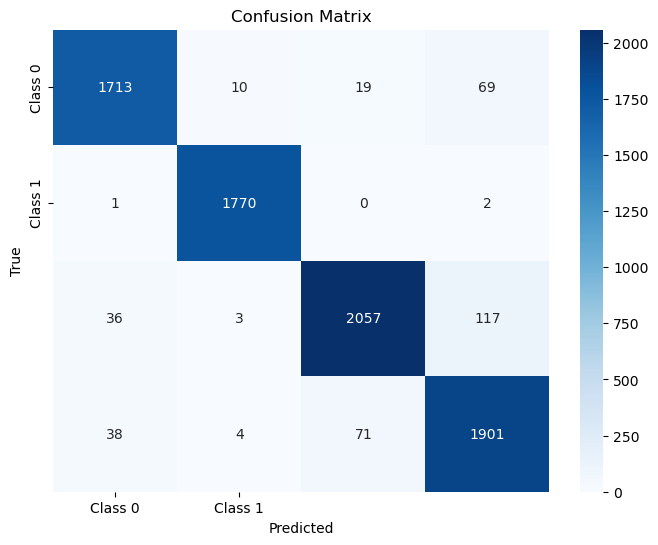

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions from the model
model.eval()  # Set to evaluation mode
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in dataloaders['new_train']:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1","Class 2","Class3"], yticklabels=["Class 0", "Class 1","Class 2","Class 4"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [17]:
import torch

# Variables to track predictions and true labels
correct = 0
total = 0

# Disable gradient calculations during inference for faster computation
with torch.no_grad():
    for inputs, labels in dataloaders['new_test']:
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to device (GPU/CPU)
        
        # Forward pass: Get model outputs (predictions)
        outputs = model(inputs)
        
        # Get the predicted class (the class with the highest probability)
        _, predicted = torch.max(outputs, 1)
        
        # Update total and correct predictions count
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 95.24%


In [19]:
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize lists to store true labels and predicted labels
all_true_labels = []
all_predicted_labels = []

with torch.no_grad():
    for inputs, labels in dataloaders['new_test']:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        
        all_true_labels.extend(labels.cpu().numpy())
        all_predicted_labels.extend(predicted.cpu().numpy())

# Compute precision, recall, and F1-score
precision = precision_score(all_true_labels, all_predicted_labels, average='weighted')
recall = recall_score(all_true_labels, all_predicted_labels, average='weighted')
f1 = f1_score(all_true_labels, all_predicted_labels, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Precision: 0.95
Recall: 0.95
F1-Score: 0.95


In [21]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names)

print(report)

                      precision    recall  f1-score   support

     Mild Impairment       0.96      0.95      0.95      1811
 Moderate Impairment       0.99      1.00      0.99      1773
       No Impairment       0.96      0.93      0.94      2213
Very Mild Impairment       0.91      0.94      0.93      2014

            accuracy                           0.95      7811
           macro avg       0.95      0.95      0.95      7811
        weighted avg       0.95      0.95      0.95      7811

